# Introducción a geopandas

## Qué vamos a hacer?
- Mapa categorizado
- Combinar figuras

### Cargar librerías:

In [1]:
# cargar librerías
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd

plt.rcParams['figure.figsize'] = (10, 5)

## Combinar figuras
---------------------

Capas SIG territorio:
http://www.ign.gob.ar/NuestrasActividades/InformacionGeoespacial/CapasSIG

Capas SIG Fibra óptica:
http://datos.arsat.com.ar/home


#### Leer archivo geojson:

In [2]:
# ruta al geojson del pais
argentina_fp = 'capas/pais_geojson/pais.geojson'
map_gdf = gpd.read_file(argentina_fp)
map_gdf.head()

,FNA,GNA,NAM,SAG,IN1,geometry
0,República Argentina,República,Argentina,IGN,200,(POLYGON ((-59.80423500799998 -80.346160665999...


### Graficar

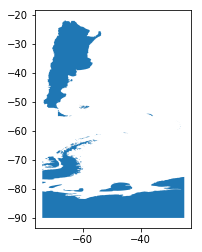

In [3]:
map_gdf.plot()

### Mapa por departamentos:

Vamos a leer otro archivo geojson con información por departamento:

In [4]:
departamentos = gpd.read_file('capas/departamento_geojson/departamento.geojson')
departamentos.head()

,FNA,GNA,NAM,SAG,IN1,geometry
0,Departamento Antártida Argentina,Departamento,Antártida Argentina,SCAR,94028,"(POLYGON ((-26.13595014499998 -90, -73.5541041..."
1,Departamento Islas del Atlántico Sur,Departamento,Islas del Atlántico Sur,IGN,94021,(POLYGON ((-58.96740100699998 -51.233822301999...
2,Departamento Tapenagá,Departamento,Tapenagá,Direc. Pcial. de Catastro y Cartografía,22161,(POLYGON ((-59.59724174799999 -27.286388690999...
3,Departamento Concordia,Departamento,Concordia,ATER - Direc. de Catastro,30015,(POLYGON ((-58.38760625899994 -30.828888170999...
4,Departamento Federal,Departamento,Federal,ATER - Direc. de Catastro,30035,(POLYGON ((-58.96264851599994 -30.603443993999...


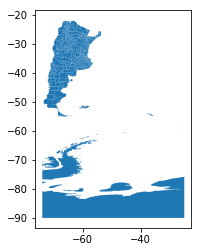

In [5]:
departamentos.plot()

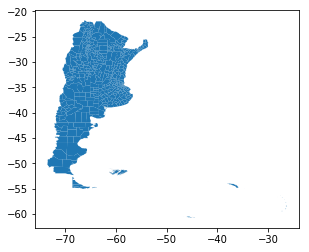

In [6]:
departamentos = departamentos[ departamentos.NAM != 'Antártida Argentina' ]
departamentos.plot()

Contar departamentos, partidos y comunas:

In [7]:
departamentos.GNA.value_counts()

Departamento    378
Partido         135
Comuna           15
Name: GNA, dtype: int64

### Centros poblados:
Cargamos un archivo _shapefile_:

In [8]:
centros_poblados = gpd.read_file('capas/CENTROS_POBLADOS/CENTROS_POBLADOS.shp')
centros_poblados.head()

,Objeto,FNA,GNA,NAm,CA1,CA2,SAG,geometry
0,Asentamiento Humano,RÃ­o Colorado,None,None,Cabecera de Departamento o Partido,CategorÃ­a 5,InformaciÃ³n extraida del Censo 2001,POINT Z (-64.09385712599993 -38.99683031599994...
1,Asentamiento Humano,Choele Choel,None,None,Cabecera de Departamento o Partido,CategorÃ­a 5,InformaciÃ³n extraida del Censo 2001,POINT Z (-65.65817703299996 -39.29313954699995...
2,Asentamiento Humano,General Roca,None,None,Cabecera de Departamento o Partido,CategorÃ­a 4,InformaciÃ³n extraida del Censo 2001,POINT Z (-67.57389068599997 -39.02801895099998...
3,Asentamiento Humano,El Cuy,None,None,Cabecera de Departamento o Partido,CategorÃ­a 8,InformaciÃ³n extraida del Censo 2001,POINT Z (-68.35102858599998 -39.93013562699997...
4,Asentamiento Humano,General Conesa,None,None,Cabecera de Departamento o Partido,CategorÃ­a 5,InformaciÃ³n extraida del Censo 2001,POINT Z (-64.45249938999996 -40.10808181799996...


**¿Qué tipos de objetos tiene el dataframe 'centros poblados'?**

In [9]:
centros_poblados.Objeto.value_counts()

Otros Asentamientos    7910
Asentamiento Humano     471
Name: Objeto, dtype: int64

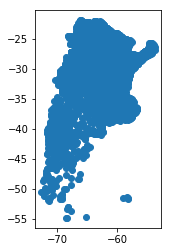

In [10]:
centros_poblados.plot()

### Mezclar las capas:

Mezclar las capas --> mapa + centros poblados

> **¡Recordar que ambas capas deben tener el mismo sistema de coordenadas de referencia!**

In [11]:
# Obtenemos el CRS de la capa base
gridCRS = departamentos.crs
# Reprojectamos las geometrias de los centros poblados
centros_poblados['geometry'] = centros_poblados['geometry'].to_crs(crs=gridCRS)

# tamaño de la figura:
figsize = (20, 18)

#### Dibujar:

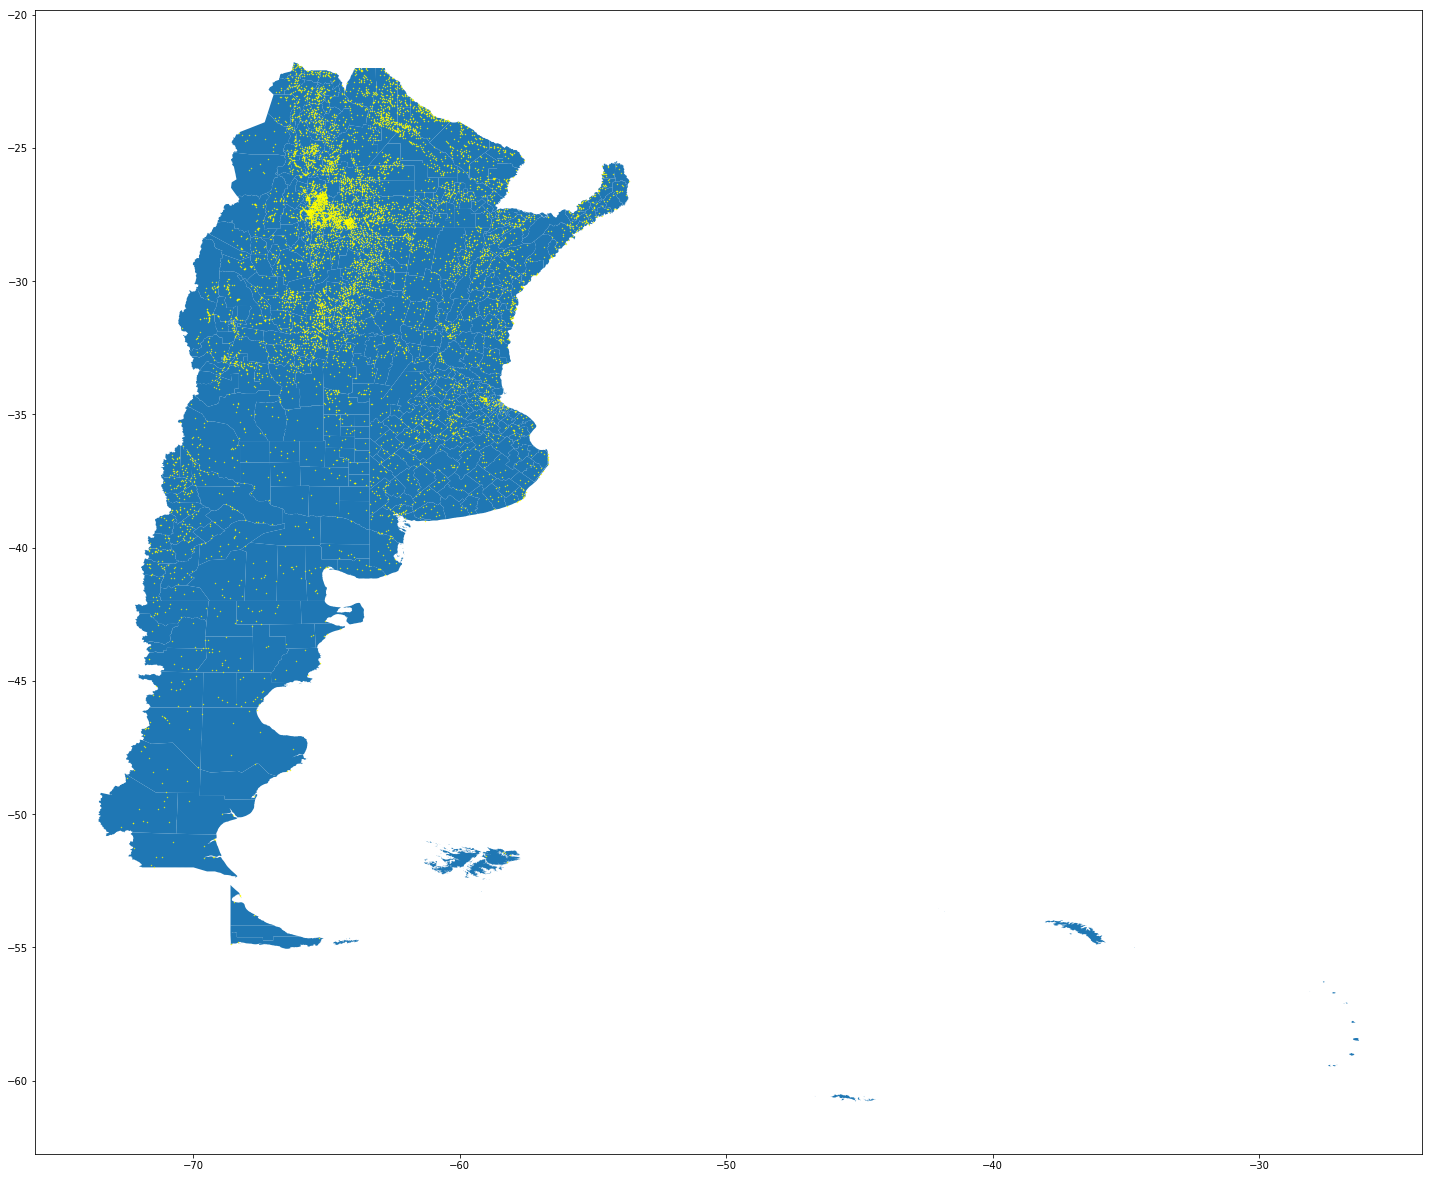

In [12]:
# obtenemos la instancia de matplotlib axes para continuar agregandole formas:
mapa = departamentos.plot(linewidth=0.03, figsize=figsize)
# Agregamos los centros poblados a la capa anterior:
centros_poblados.plot(ax=mapa, color="yellow", markersize=0.15)
plt.tight_layout()

### Fibra optica en servicio:

Cargamos la **data desde un csv**

In [13]:
fibra_en_servicio = pd.read_csv('data/fibra-optica-en-servicio.csv',header=None)
fibra_en_servicio.head()

,0,1,2
0,La Quiaca - Tres Cruces,NaN,"-65.59126058578096,-22.10585360110609,0.0 -65...."
1,Tres Cruces - Humahuaca,NaN,"-65.58804437488585,-22.92080022305135,0.0 -65...."
2,Humahuaca - Tilcara,NaN,"-65.35212907393128,-23.20070917229817,0.0 -65...."
3,Tilcara - S.S. Jujuy,NaN,"-65.39816893040408,-23.57301936031882,0.0 -65...."
4,Jujuy - La Quiaca,NaN,"-66.41629678970608,-24.14962166556139,0.0 -66...."


Limpiar cadenas (columna 2):

> **En la columna 2 tenemos un conjunto de puntos que representan un lista, pero en str**

In [14]:
cadena = fibra_en_servicio.loc[0,2]
print('cadena fibra[0,2]\n--> str:\n{}...\n\n-->formateada:\n{}'.format(
    cadena[:100],
    '\n'.join(cadena.split(' ')[:10])))


cadena fibra[0,2]
--> str:
-65.59126058578096,-22.10585360110609,0.0 -65.5912464876881,-22.10595873601848,0.0 -65.5921445990437...

-->formateada:
-65.59126058578096,-22.10585360110609,0.0
-65.5912464876881,-22.10595873601848,0.0
-65.59214459904379,-22.1060608532855,0.0
-65.5919512267678,-22.10782033265773,0.0
-65.59211526273826,-22.10788671630029,0.0
-65.59300455845381,-22.10794381682707,0.0
-65.59348003119905,-22.10799625867836,0.0
-65.59378519166421,-22.10796021741427,0.0
-65.59407861995354,-22.10805761631806,0.0
-65.59472854144308,-22.10813844327464,0.0


### Convertir a LineStrings

Creamos una funcion que sepa pasar esas **cadenas a objetos (geometrías) LineStrings de shapely**

In [15]:
from shapely.geometry import LineString

def parsear_str(coordenadas):
    """ Limpia las coordenadas recibidas.
    Args:
        coordenadas (str): Cadena que contiene las
            coordenadas de la linea.
    Returns:
        list of float: Lista con las tuplas xy de coordenadas.
    """
    tuplas = []
    for i, coordenadas_i in enumerate(coordenadas.strip().split(' ')):
        x , y = coordenadas_i.split(',')[:2]
        tuplas.append( (float(x), float(y)) )  # agregamos una tupla.
    return tuplas

def to_linestring(s):
    """ Convierte la cadena de coordenadas en un Shapely.LineString
    Args:
        s (str): Cadena de puntos de la linea  
    Returns:
        shapely.geometry.linestring.LineString
    """
    return LineString(parsear_str(s))

Probamos:

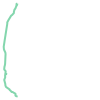

In [16]:
LineString(parsear_str(fibra_en_servicio.loc[0,2]))

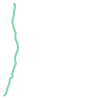

In [17]:
LineString(parsear_str(fibra_en_servicio.loc[2,2]))

Creamos una **nueva columna 'coordenadas' con objetos shapely:**

In [18]:
fibra_en_servicio['coordenadas'] = fibra_en_servicio[2].apply(to_linestring)
fibra_en_servicio.head(4)

,0,1,2,coordenadas
0,La Quiaca - Tres Cruces,NaN,"-65.59126058578096,-22.10585360110609,0.0 -65....",LINESTRING (-65.59126058578096 -22.10585360110...
1,Tres Cruces - Humahuaca,NaN,"-65.58804437488585,-22.92080022305135,0.0 -65....",LINESTRING (-65.58804437488585 -22.92080022305...
2,Humahuaca - Tilcara,NaN,"-65.35212907393128,-23.20070917229817,0.0 -65....",LINESTRING (-65.35212907393128 -23.20070917229...
3,Tilcara - S.S. Jujuy,NaN,"-65.39816893040408,-23.57301936031882,0.0 -65....",LINESTRING (-65.39816893040408 -23.57301936031...


### Creamos un geodataframe a partir del (pandas) dataframe:

In [19]:
fibra_en_servicio_gdf = gpd.GeoDataFrame(fibra_en_servicio,
                                         crs=gridCRS,
                                         geometry=fibra_en_servicio['coordenadas'])

> **_El gridCRS es el sistema de coordenadas de referencia que usamos con las capas anteriores..._**

Nos quedamos solo con la información que nos interesa:

In [20]:
fibra_en_servicio_gdf = fibra_en_servicio_gdf.drop([1, 2 ,'coordenadas'], axis=1)
fibra_en_servicio_gdf.head(3)

,0,geometry
0,La Quiaca - Tres Cruces,LINESTRING (-65.59126058578096 -22.10585360110...
1,Tres Cruces - Humahuaca,LINESTRING (-65.58804437488585 -22.92080022305...
2,Humahuaca - Tilcara,LINESTRING (-65.35212907393128 -23.20070917229...


### Juntamos las capas:

In [21]:
# Obtenemos el CRS de la capa base
gridCRS = departamentos.crs
# Reprojectamos las geometrias de los centros poblados
centros_poblados['geometry'] = centros_poblados['geometry'].to_crs(crs=gridCRS)
fibra_en_servicio_gdf['geometry'] = fibra_en_servicio_gdf['geometry'].to_crs(crs=gridCRS)

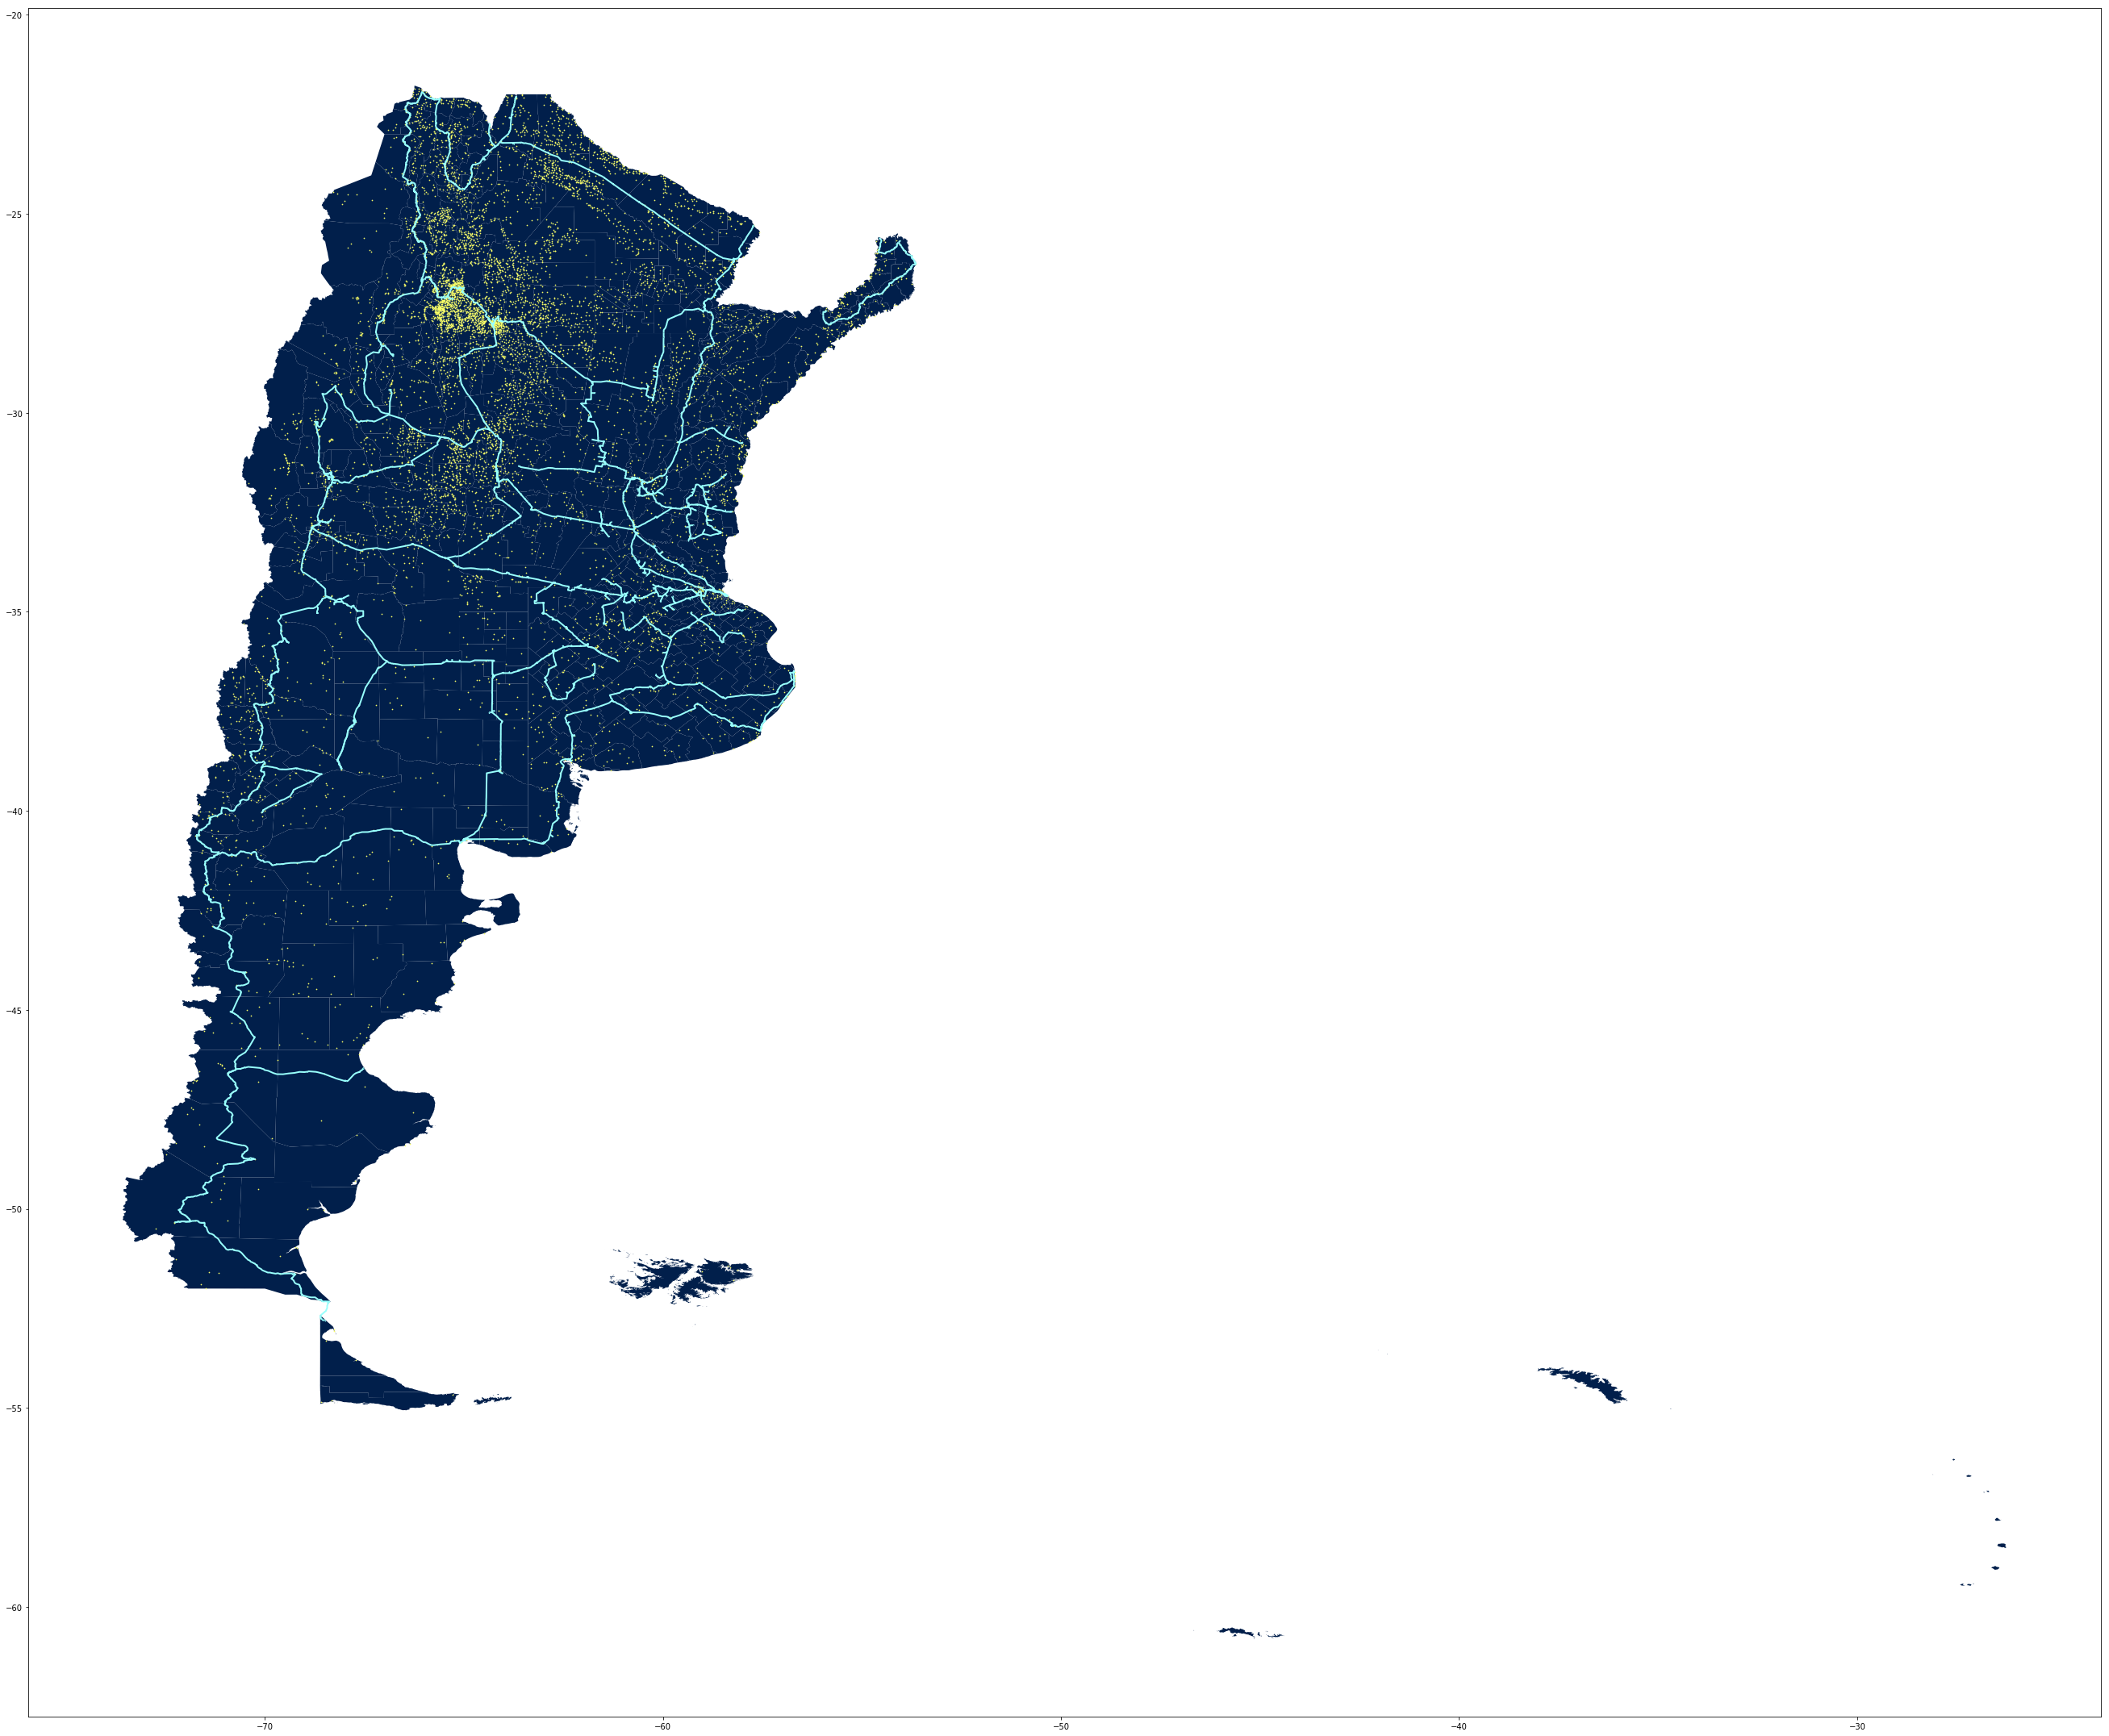

In [22]:
# tamaño de la figura:
figsize = (46, 30)
# obtenemos la instancia de matplotlib axes para continuar agregandole formas:
mapa = departamentos.plot(color='#011f4b', linewidth=0.05, figsize=figsize)
# Agregamos los centros poblados a la capa anterior:
centros_poblados.plot(ax=mapa, color="#faff67", markersize=0.5)
# Agregamos la fibra optica a la capa anterior:
fibra_en_servicio_gdf.plot(ax=mapa, color="#98fffc", linewidth=1.99)
plt.tight_layout()

### Fibra optica en construcción:

Leemos los datos desde un json:

In [23]:
# fo , de fibra óptica
fo_en_construccion = pd.read_json('data/fibra-optica-en-construccion.json')
fo_en_construccion.head()

,0,1,2
0,ConexiÃ³n Transener 125-Lumbreras,,"-64.92694657663864,-25.21055241695973,0.0 -64...."
1,DerivaciÃ³n Cobos,,"-65.08210405096595,-24.74313184141212,0.0 -65...."
2,DerivaciÃ³n ex sitio Villa Libertad,,"-55.31238407666016,-27.56012362135645,0.0 -55...."
3,DerivaciÃ³n Guarani,,"-55.16013822147799,-27.52483332231678,4.0 -55...."
4,Urbano ParaÃ­so,,"-54.20609840290705,-26.69403801019241,0.0 -54...."


In [24]:
fo_en_construccion['geometry'] = fo_en_construccion[2].apply(to_linestring)
fo_en_construccion.head(4)

,0,1,2,geometry
0,ConexiÃ³n Transener 125-Lumbreras,,"-64.92694657663864,-25.21055241695973,0.0 -64....",LINESTRING (-64.92694657663864 -25.21055241695...
1,DerivaciÃ³n Cobos,,"-65.08210405096595,-24.74313184141212,0.0 -65....",LINESTRING (-65.08210405096595 -24.74313184141...
2,DerivaciÃ³n ex sitio Villa Libertad,,"-55.31238407666016,-27.56012362135645,0.0 -55....",LINESTRING (-55.31238407666016 -27.56012362135...
3,DerivaciÃ³n Guarani,,"-55.16013822147799,-27.52483332231678,4.0 -55....",LINESTRING (-55.16013822147799 -27.52483332231...


In [25]:
fo_en_construccion_gdf = gpd.GeoDataFrame(fo_en_construccion, crs=gridCRS)
fo_en_construccion_gdf = fo_en_construccion_gdf.drop([1, 2], axis=1)
fo_en_construccion_gdf.head(4)

,0,geometry
0,ConexiÃ³n Transener 125-Lumbreras,LINESTRING (-64.92694657663864 -25.21055241695...
1,DerivaciÃ³n Cobos,LINESTRING (-65.08210405096595 -24.74313184141...
2,DerivaciÃ³n ex sitio Villa Libertad,LINESTRING (-55.31238407666016 -27.56012362135...
3,DerivaciÃ³n Guarani,LINESTRING (-55.16013822147799 -27.52483332231...


### Juntamos nuevamente:

Mapa Argentina + centros poblados + fibra óptica en servicio + fibra en construcción

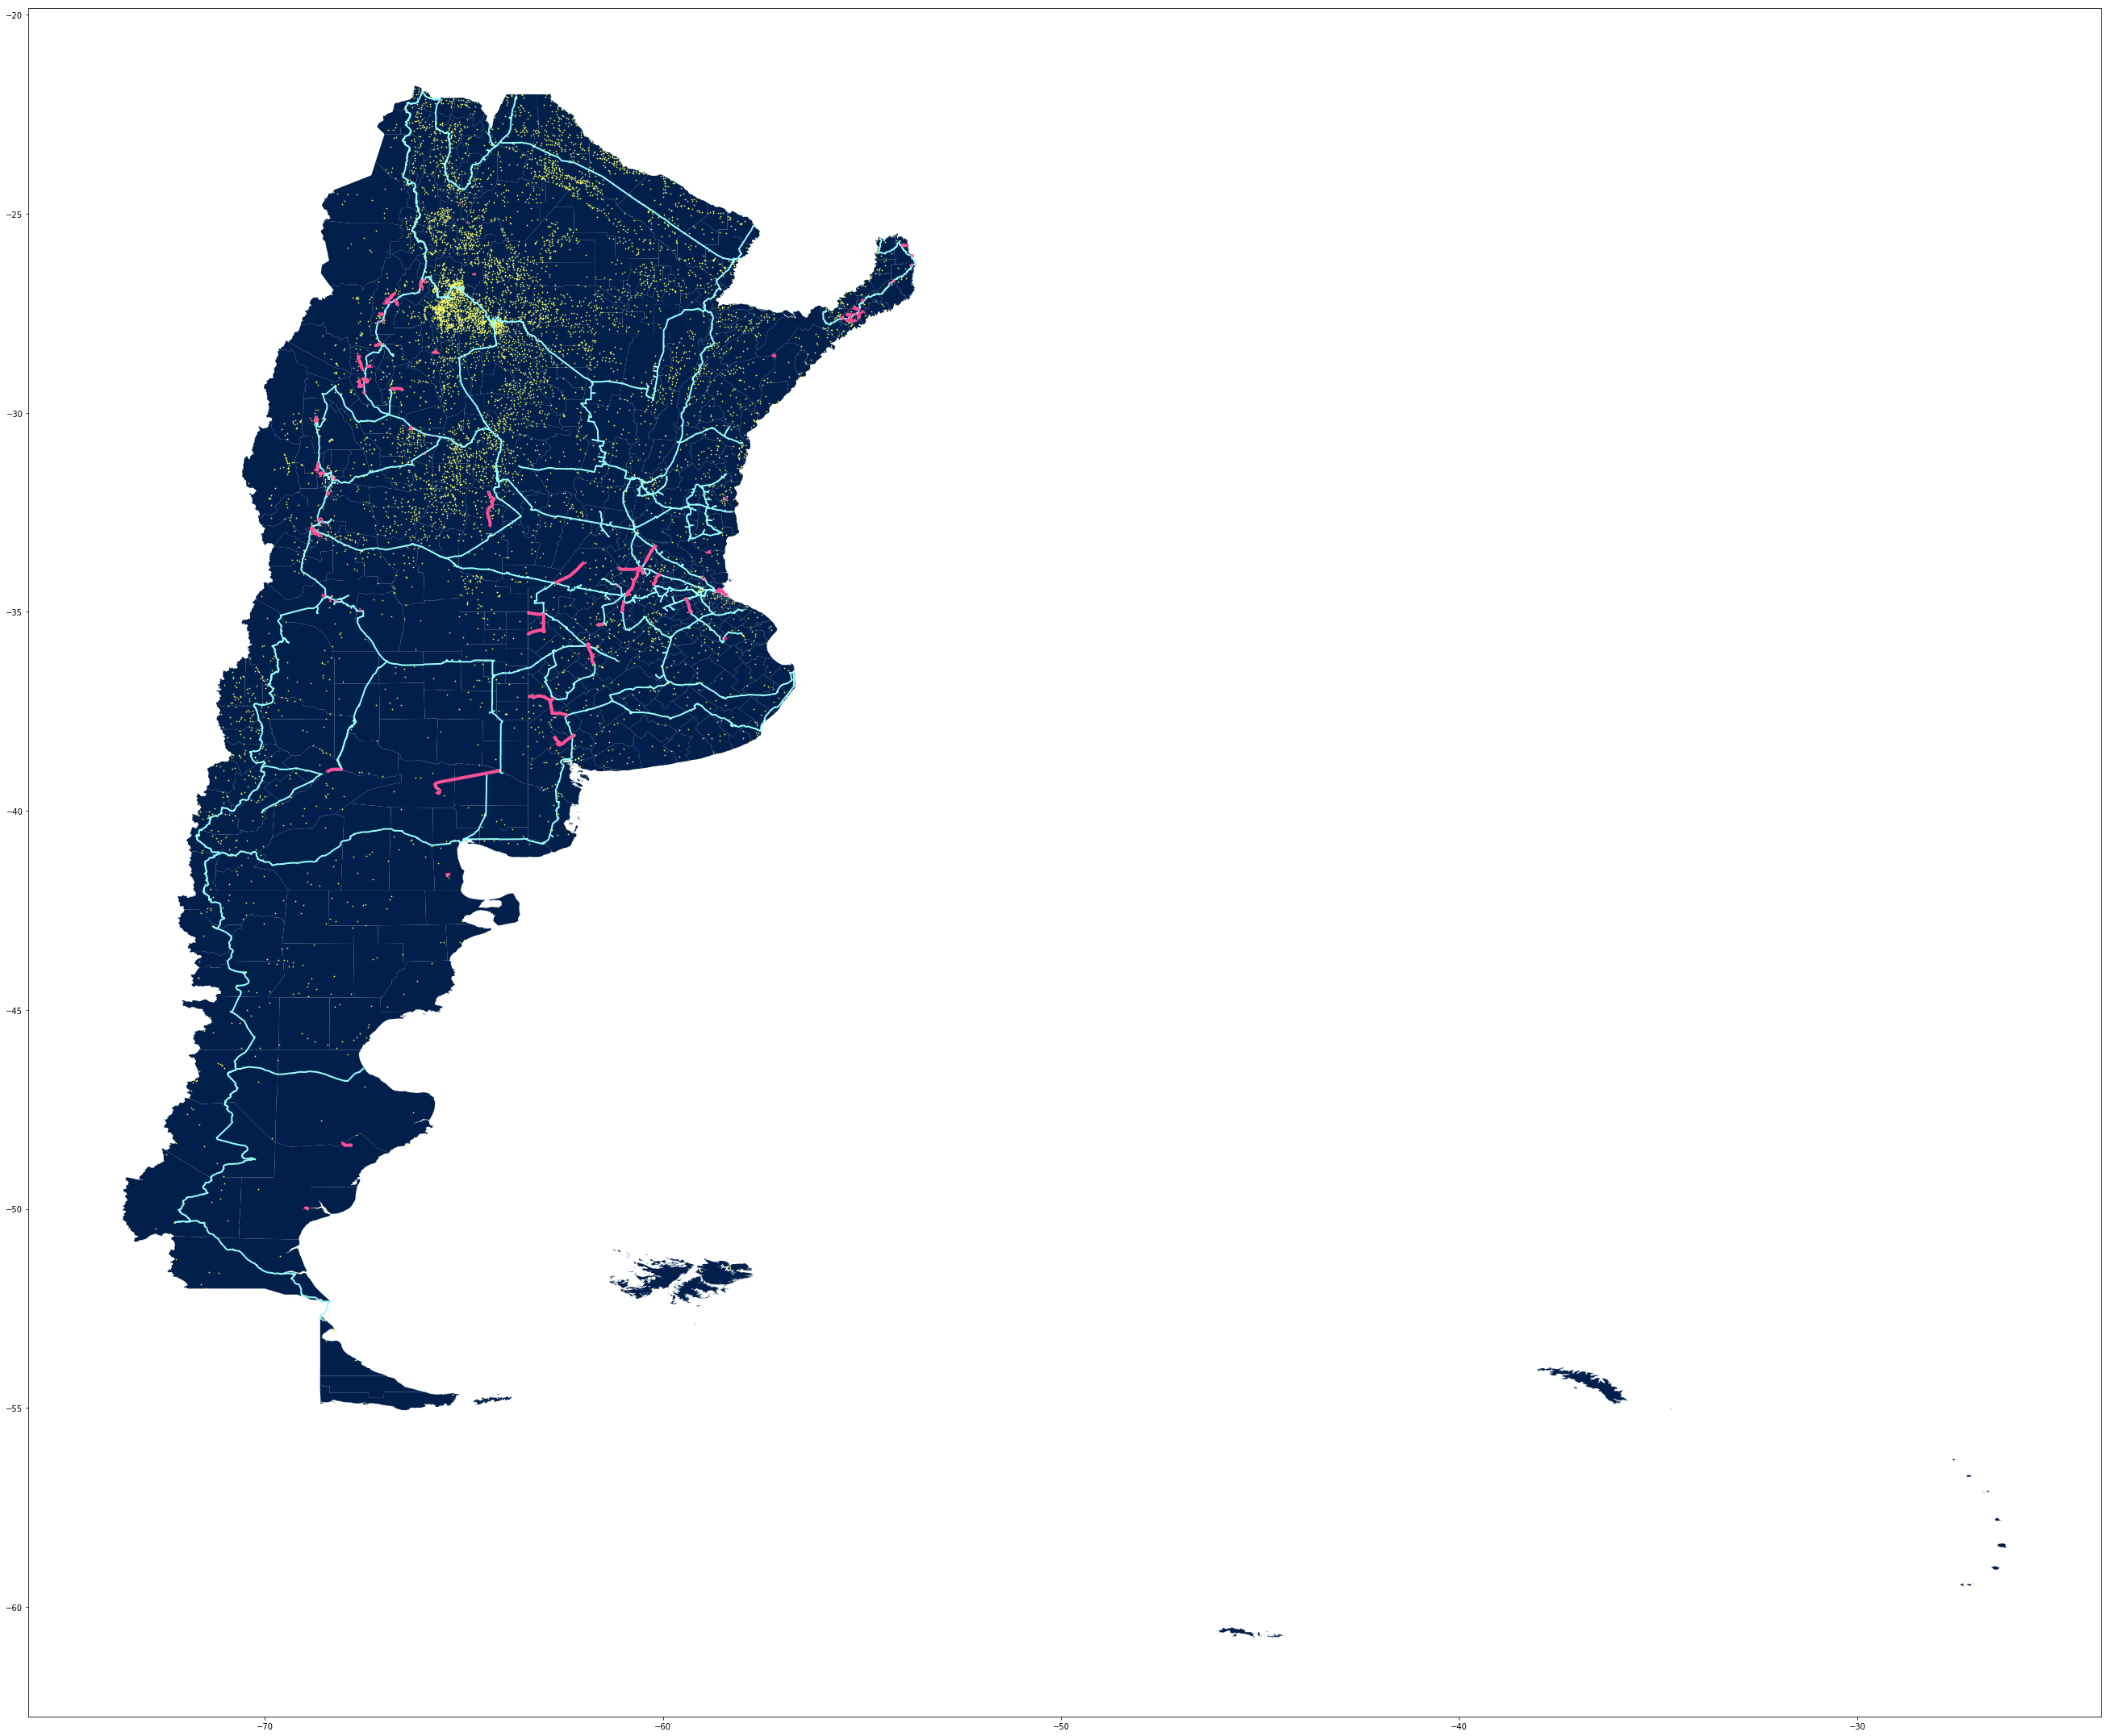

In [26]:
# tamaño de la figura:
figsize = (40, 30)
# obtenemos la instancia de matplotlib axes para continuar agregandole formas:
mapa = departamentos.plot(color='#011f4b', linewidth=0.05, figsize=figsize)
# Agregamos los centros poblados a la capa anterior:
centros_poblados.plot(ax=mapa, color="#faff67", markersize=0.5)
fibra_en_servicio_gdf.plot(ax=mapa, color="#98fffc", linewidth=1.99)
fo_en_construccion_gdf.plot(ax=mapa, color="#ff5197", linewidth=4.0)
plt.tight_layout()

### Fibra optica sin iluminar:

In [27]:
fo_sin_iluminar = pd.read_json('data/fibra-optica-sin-iluminar.json')
fo_sin_iluminar.head(4)

,0,1,2
0,Nuevo Pirquitas,,"-66.45395871939317,-22.68784022925714,0.0 -66...."
1,Tumbaya,,"-65.46644874293945,-23.8542654307385,0.0 -65.4..."
2,PalpalÃ¡ - Centro Forestal,,"-65.21197545813466,-24.25786784507341,0.0 -65...."
3,Barrios,,"-65.57509868577056,-22.12187319530868,0.0 -65...."


In [28]:
filtro = fo_sin_iluminar[2].str.split(',').str.len() > 4
fo_sin_iluminar = fo_sin_iluminar[filtro]

fo_sin_iluminar['geometry'] = fo_sin_iluminar[2].apply(to_linestring)
fo_sin_iluminar_gdf = gpd.GeoDataFrame(fo_sin_iluminar, crs=gridCRS)
fo_sin_iluminar_gdf = fo_sin_iluminar_gdf.drop([1, 2], axis=1)
fo_sin_iluminar_gdf.head(4)

,0,geometry
0,Nuevo Pirquitas,LINESTRING (-66.45395871939317 -22.68784022925...
1,Tumbaya,LINESTRING (-65.46644874293945 -23.85426543073...
2,PalpalÃ¡ - Centro Forestal,LINESTRING (-65.21197545813466 -24.25786784507...
3,Barrios,LINESTRING (-65.57509868577056 -22.12187319530...


### Mezclamos las 5 capas:

Mapa Argentina + centros poblados + fibra óptica en servicio +
fibra en construcción + fibra sin iluminar

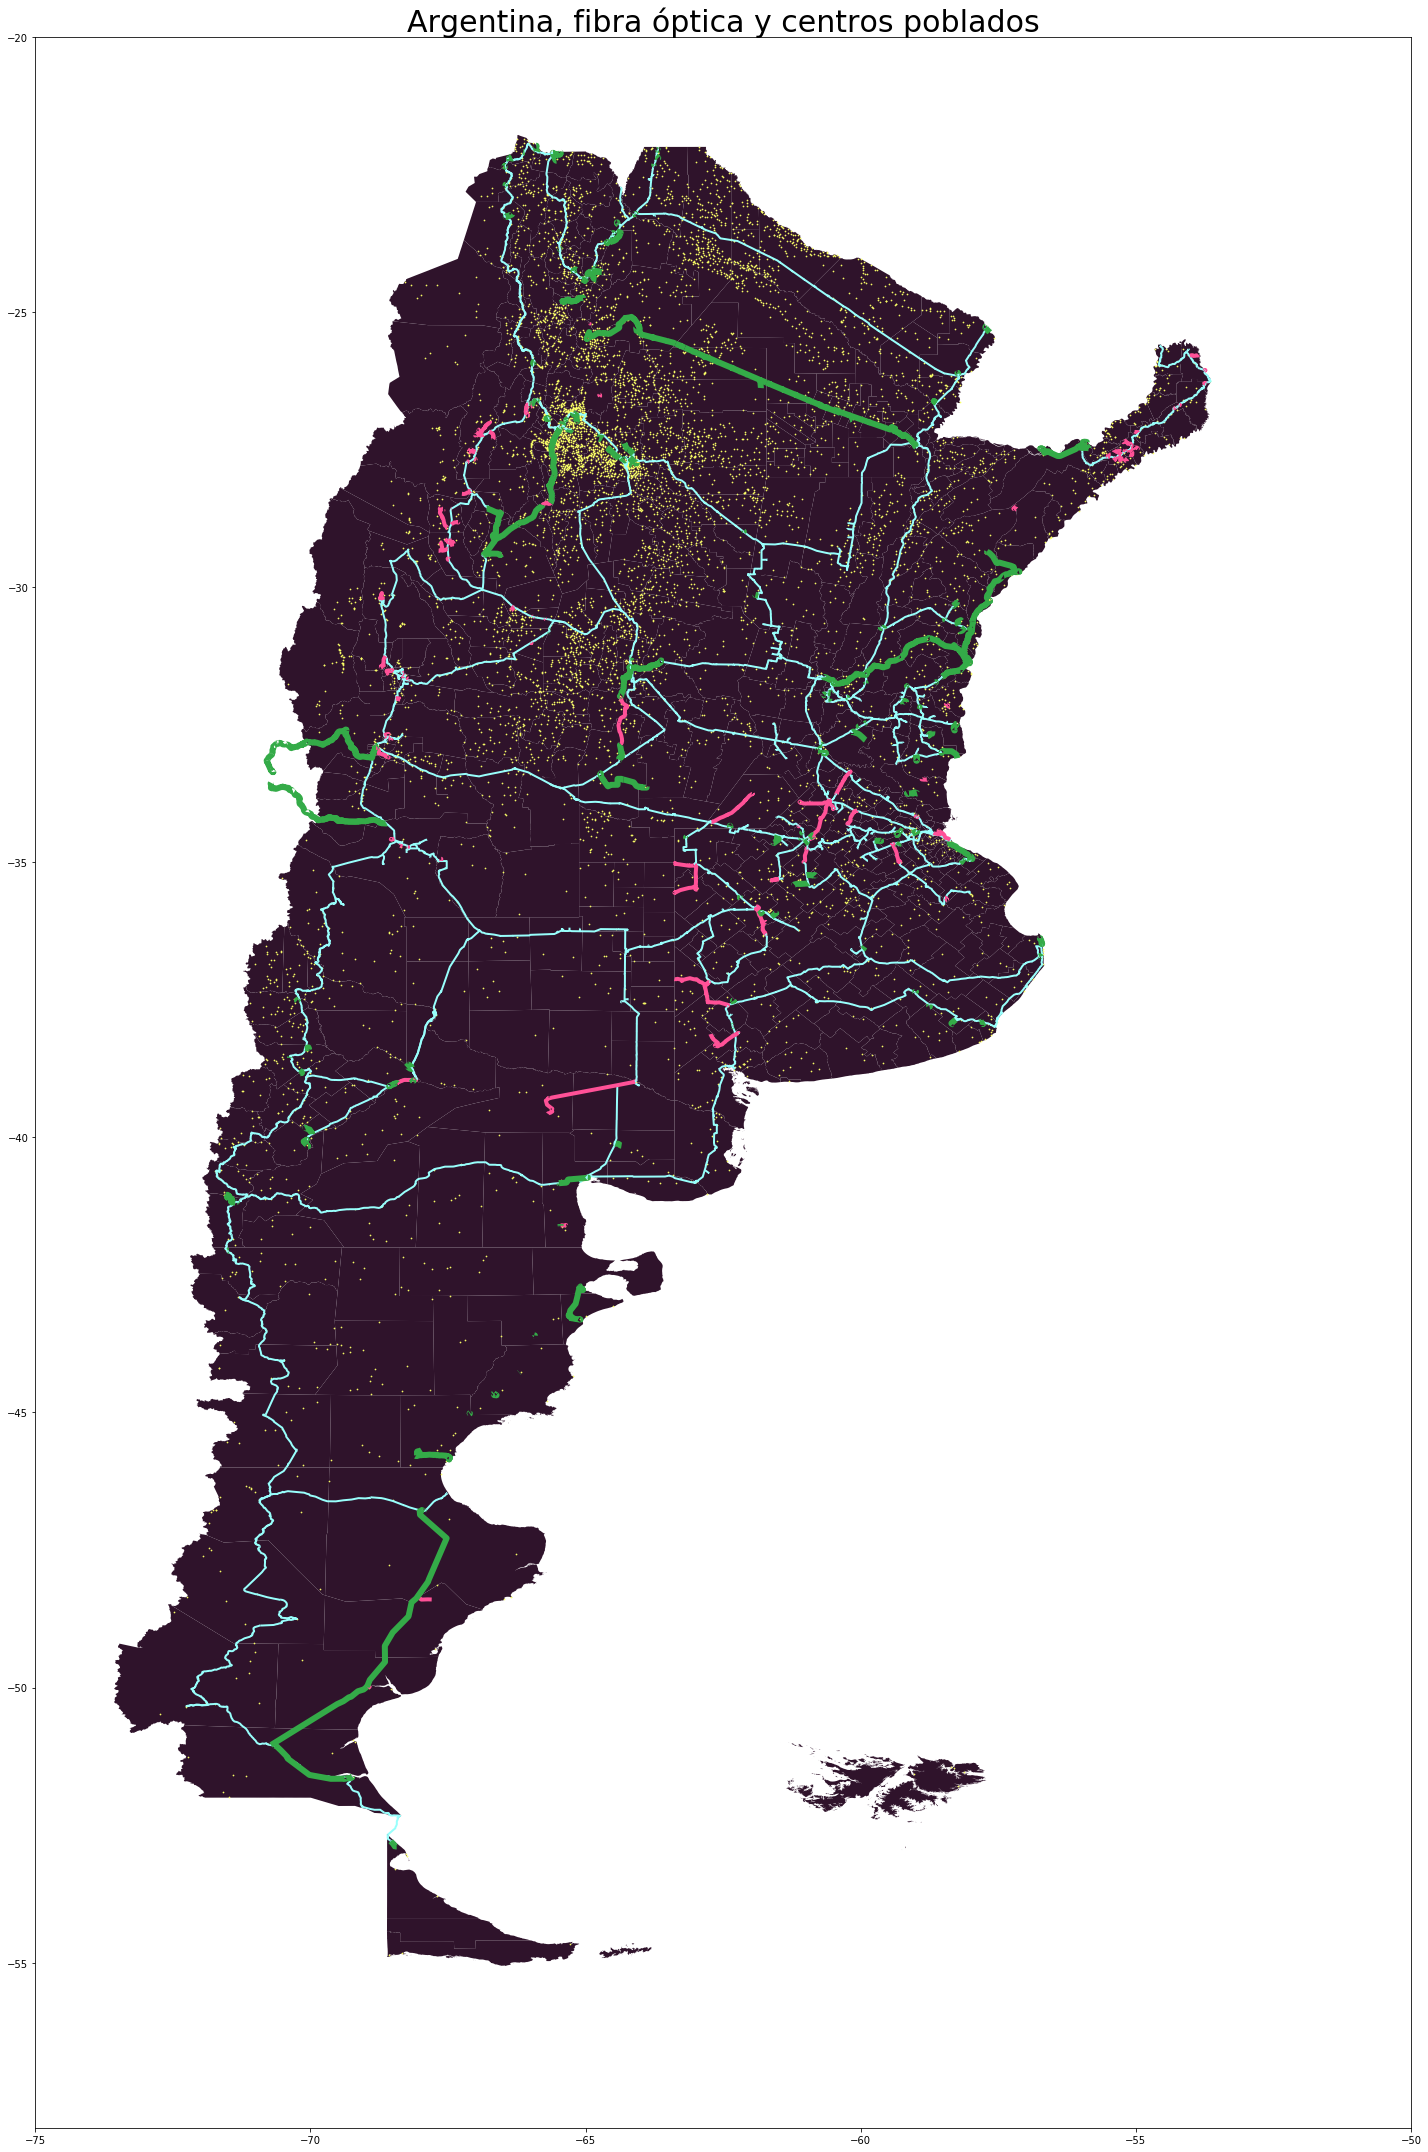

In [29]:
# tamaño de la figura:
figsize = (50, 30)
# obtenemos la instancia de matplotlib axes para continuar agregandole formas:
mapa = departamentos.plot(color='#2f132b', linewidth=0.05, figsize=figsize)

mapa.set_title('Argentina, fibra óptica y centros poblados',
               fontdict={'fontsize': '30',
                         'fontweight' : '7'})
# Agregamos los centros poblados a la capa anterior:
centros_poblados.plot(ax=mapa, color="#faff67", markersize=0.5)
fibra_en_servicio_gdf.plot(ax=mapa, color="#98fffc", linewidth=1.99)
fo_en_construccion_gdf.plot(ax=mapa, color="#ff5197", linewidth=4.0)
fo_sin_iluminar_gdf.plot(ax=mapa, color="#34ab48", linewidth=6.0)

mapa.set(xlim=(-75, -50), ylim=(-58, -20))
outfp = r"output/static_map.png"
plt.tight_layout()
plt.savefig(outfp, dpi=300)

## Mapa categorizado

Configuración del mapa:

In [30]:
colors = 9
cmap = 'Blues'
figsize = (10, 20)
title = 'Mapa categorizado'
shapefile = 'data/chubut-departamentos/chubut_departamentos.shp'

### Mapa Chubut

Leemos la información desde un **shapefile**

In [31]:
gdf_chubut = gpd.read_file(shapefile)
gdf_chubut.head(6)

,toponimo_i,nombre,link,varones,mujeres,tot_pob,hogares,viv_part,viv_part_h,geometry
0,69922,Telsen,26105,876.0,768.0,1644.0,632.0,882.0,1182.0,POLYGON ((-66.88477156289098 -42.0120365784082...
1,69872,Biedma,26007,41186.0,41697.0,82883.0,24471.0,27851.0,46016.0,(POLYGON ((-64.51539459861615 -42.421378434739...
2,106666,Cushamen,26014,10562.0,10357.0,20919.0,6714.0,7955.0,11936.0,POLYGON ((-71.15581286208599 -42.0197498209389...
3,69881,Escalante,26021,93795.0,92788.0,186583.0,56875.0,62051.0,105540.0,POLYGON ((-68.3752533881883 -44.68874893409749...
4,69774,Florentino Ameghino,26028,923.0,704.0,1627.0,479.0,648.0,920.0,(POLYGON ((-66.30172186111562 -45.079007133654...
5,69750,Futaleufú,26035,21043.0,22033.0,43076.0,13740.0,15320.0,25666.0,POLYGON ((-72.02891098616159 -42.4850150556792...


Dibujar el mapa:

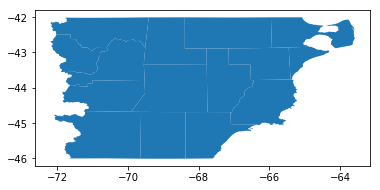

In [32]:
gdf_chubut.plot()

### Intervalos iguales:

Pintamos segun el ** total de población presente en cada departamento:** 

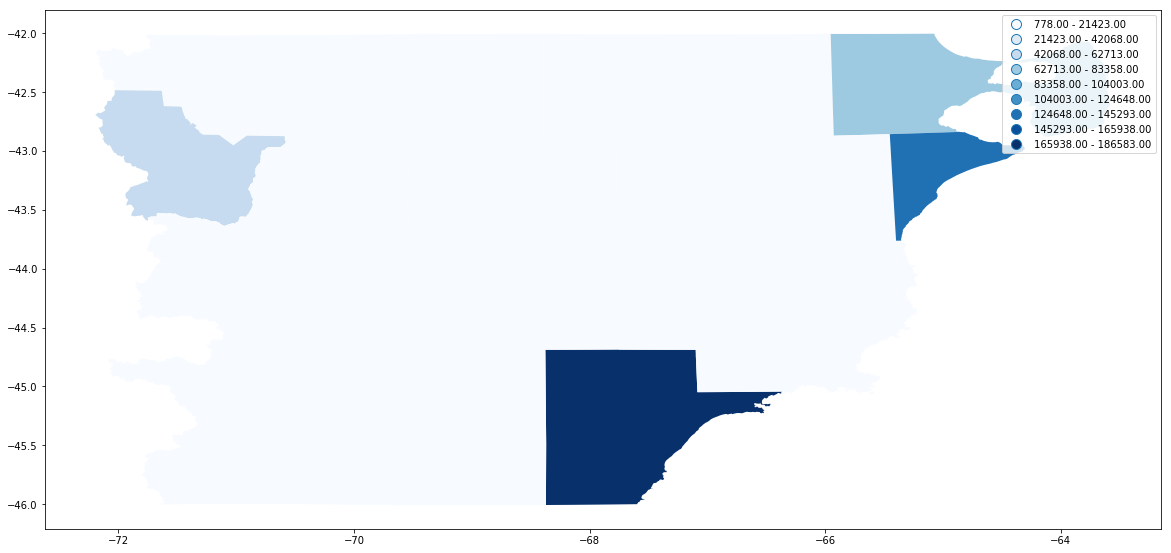

In [37]:
gdf_chubut.plot(column='tot_pob',
                cmap=cmap,
                figsize=figsize,
                scheme='equal_interval', k=colors, legend=True)

### Fisher Jenks

Obtenemos los centroides de los departamentos para poner la etiqueta de nombre:

In [34]:
gdf_chubut['centroid'] = gdf_chubut['geometry'].centroid
gdf_chubut.head(3)

,toponimo_i,nombre,link,varones,mujeres,tot_pob,hogares,viv_part,viv_part_h,geometry,centroid
0,69922,Telsen,26105,876.0,768.0,1644.0,632.0,882.0,1182.0,POLYGON ((-66.88477156289098 -42.0120365784082...,POINT (-67.16983515024167 -42.44802570867554)
1,69872,Biedma,26007,41186.0,41697.0,82883.0,24471.0,27851.0,46016.0,(POLYGON ((-64.51539459861615 -42.421378434739...,POINT (-64.92114375171695 -42.44871162862378)
2,106666,Cushamen,26014,10562.0,10357.0,20919.0,6714.0,7955.0,11936.0,POLYGON ((-71.15581286208599 -42.0197498209389...,POINT (-70.70035763016752 -42.37916012142627)


> Fisher Jenks: "[...]This is done by seeking to minimize each class’s average deviation from the class mean, while maximizing each class’s deviation from the means of the other groups. In other words, the method seeks to reduce the variance within classes and maximize the variance between classes".
(Wikipedia)

### Dibujamos el mapa

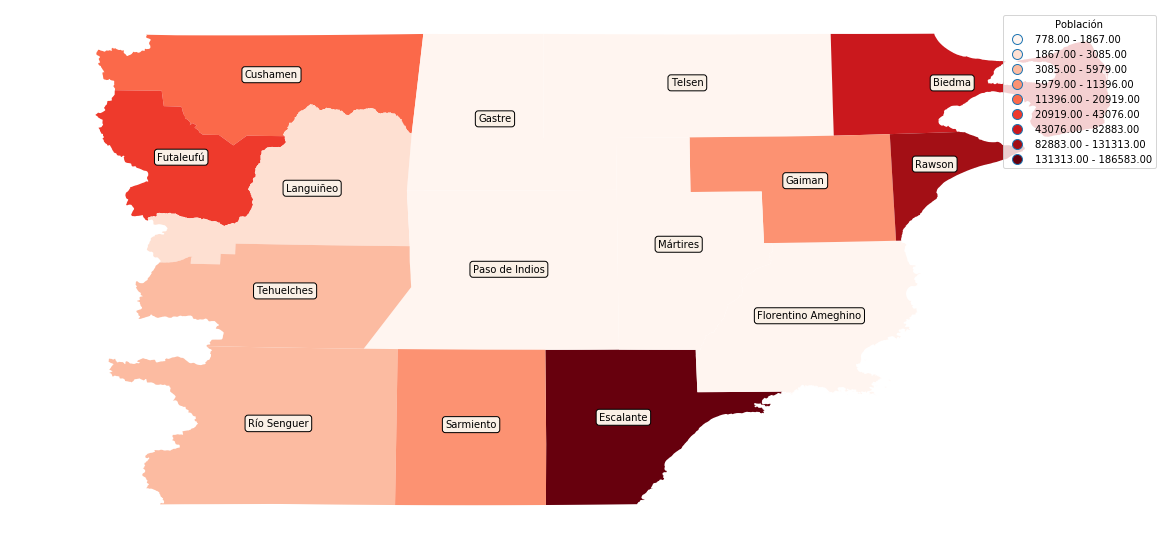

In [35]:
# Ploteamos de forma similar al anterior, con algunos agregados
figsize = (20, 20)
# Figura base
fig, ax = plt.subplots(1, figsize=figsize)
# Dibujamos el mapa sobre la figura
gdf_chubut.plot(column='tot_pob',  # columna para categorizar
                cmap='Reds',
                # figsize=figsize,
                scheme='fisher_jenks',
                k=colors,
                legend=True,
                legend_kwds={  # propiedades de la cajita de la leyenda
                    'title': 'Población',
                    'bbox_to_anchor':(1, 1),
                    'bbox_to_anchor':(0., 1., 1., .1),
                    'bbox_to_anchor':[1, 1]
                }, ax=ax)

# Cajitas de nombres de los departamentos:
props = dict(boxstyle='round', facecolor='linen', alpha=1)
for point in gdf_chubut.iterrows():
    ax.text(point[1]['centroid'].x,
            point[1]['centroid'].y,
            point[1]['nombre'],
            horizontalalignment='center',
            fontsize=10,
            bbox=props)
ax.axis('off')

# Guardamos el mapa:
outfp = r"output/mapa-categorizado.png"
plt.savefig(outfp, dpi=300)

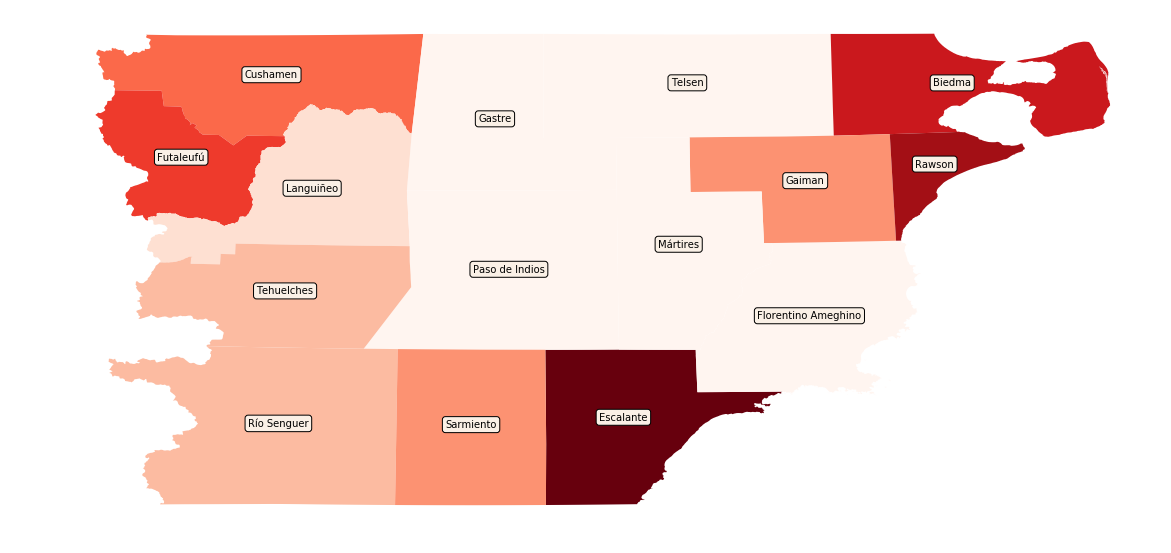

In [36]:
fig, ax = plt.subplots(1, figsize=figsize)
gdf_chubut.plot(column='tot_pob',
                cmap='Reds',
                # figsize=figsize,
                scheme='fisher_jenks',
                k=colors,
                legend=False,
                ax=ax)

props = dict(boxstyle='round', facecolor='linen', alpha=1)
for point in gdf_chubut.iterrows():
    ax.text(point[1]['centroid'].x,
            point[1]['centroid'].y,
            point[1]['nombre'],
            horizontalalignment='center',
            fontsize=10,
            bbox=props)
ax.axis('off')
outfp = r"output/mapa-categorizado.png"
plt.savefig(outfp, dpi=300)